# CT 복원 영상에서 폐, 기도, 심장 영역을 가이드 해주는 딥러닝 모델 제작
1. CT 이미지 데이터 살펴보기
2. 텐서연산을 위한 데이터셋 구축
3. U-Net 아키텍처 구현
4. Cross-Entropy, Dice loss function 구현
5. 최적화기법(SGDM) 적용
6. Dice similarity coefficient 성능지표 구현
7. 모델 학습코드 작성 및 학습
8. 모델 테스트 및 Morphological filtering post-processing 적용

# 1. CT 이미지 데이터셋 살펴보기

In [53]:
import os
import pandas as pd

In [54]:
data_dir = "./archive/"
data_df = pd.read_csv(os.path.join(data_dir, "train.csv"))
data_df

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg
...,...,...
16703,ID00426637202313170790466_403.jpg,ID00426637202313170790466_mask_403.jpg
16704,ID00426637202313170790466_404.jpg,ID00426637202313170790466_mask_404.jpg
16705,ID00426637202313170790466_405.jpg,ID00426637202313170790466_mask_405.jpg
16706,ID00426637202313170790466_406.jpg,ID00426637202313170790466_mask_406.jpg


In [55]:
data_df.head(50)

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg
5,ID00007637202177411956430_5.jpg,ID00007637202177411956430_mask_5.jpg
6,ID00007637202177411956430_6.jpg,ID00007637202177411956430_mask_6.jpg
7,ID00007637202177411956430_7.jpg,ID00007637202177411956430_mask_7.jpg
8,ID00007637202177411956430_8.jpg,ID00007637202177411956430_mask_8.jpg
9,ID00007637202177411956430_9.jpg,ID00007637202177411956430_mask_9.jpg


In [56]:
def extract_client_id(x):
    return x.split("_")[0]

data_df['Id'] = data_df.ImageId.apply(lambda x:extract_client_id(x))

In [57]:
data_df

,ImageId,MaskId,Id
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg,ID00007637202177411956430
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg,ID00007637202177411956430
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg,ID00007637202177411956430
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg,ID00007637202177411956430
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg,ID00007637202177411956430
...,...,...,...
16703,ID00426637202313170790466_403.jpg,ID00426637202313170790466_mask_403.jpg,ID00426637202313170790466
16704,ID00426637202313170790466_404.jpg,ID00426637202313170790466_mask_404.jpg,ID00426637202313170790466
16705,ID00426637202313170790466_405.jpg,ID00426637202313170790466_mask_405.jpg,ID00426637202313170790466
16706,ID00426637202313170790466_406.jpg,ID00426637202313170790466_mask_406.jpg,ID00426637202313170790466


In [70]:
import numpy as np

In [71]:
# 총 112명의 client 아이디가 있음
client_ids = np.unique(data_df.Id.values)
print(len(client_ids))

112


In [60]:
import cv2
import matplotlib.pyplot as plt

In [66]:
# 0번째 client_ids에 해당하는 데이터를 가져와 그 조건에 맞는 [ImageId, MaskId] 추출
index = 111
client_data = data_df[data_df.Id == client_ids[index]][["ImageId", "MaskId"]]

In [68]:
round(112 * 0.3)

34

In [74]:
val_index = np.random.choice(range(0, len(client_ids)), int(len(client_ids)*0.3), replace=False)

In [75]:
val_index

array([ 62,  88,  84,  24,  12,  73,  18,   6,  65,  47,  26,  46, 103,
       107,  14,   4,  79,  35,  69,  61,  15,  78,  17,  40,  33, 108,
        95,  60,  48,  92,  85,  98, 111])

In [91]:
client_index = [i for i in range(len(client_ids))]
print(client_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]


In [93]:
train_index = list(set(client_index) - set(val_index))
print(train_index)

[0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 13, 16, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 63, 64, 66, 67, 68, 70, 71, 72, 74, 75, 76, 77, 80, 81, 82, 83, 86, 87, 89, 90, 91, 93, 94, 96, 97, 99, 100, 101, 102, 104, 105, 106, 109, 110]


In [99]:
train_data = pd.DataFrame(columns = ["ImageId", "MaskId"])
for train in train_index:
    train_data = pd.concat([train_data, data_df[data_df.Id == client_ids[train]][["ImageId", "MaskId"]]])

In [100]:
val_data = pd.DataFrame(columns = ["ImageId", "MaskId"])

In [101]:
for val in val_index:
    val_data = pd.concat([val_data, data_df[data_df.Id == client_ids[val]][["ImageId", "MaskId"]]])

In [102]:
train_data

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg
...,...,...
16295,ID00423637202312137826377_285.jpg,ID00423637202312137826377_mask_285.jpg
16296,ID00423637202312137826377_286.jpg,ID00423637202312137826377_mask_286.jpg
16297,ID00423637202312137826377_287.jpg,ID00423637202312137826377_mask_287.jpg
16298,ID00423637202312137826377_288.jpg,ID00423637202312137826377_mask_288.jpg


In [103]:
val_data

,ImageId,MaskId
10089,ID00232637202260377586117_0.jpg,ID00232637202260377586117_mask_0.jpg
10090,ID00232637202260377586117_1.jpg,ID00232637202260377586117_mask_1.jpg
10091,ID00232637202260377586117_2.jpg,ID00232637202260377586117_mask_2.jpg
10092,ID00232637202260377586117_3.jpg,ID00232637202260377586117_mask_3.jpg
10093,ID00232637202260377586117_4.jpg,ID00232637202260377586117_mask_4.jpg
...,...,...
16703,ID00426637202313170790466_403.jpg,ID00426637202313170790466_mask_403.jpg
16704,ID00426637202313170790466_404.jpg,ID00426637202313170790466_mask_404.jpg
16705,ID00426637202313170790466_405.jpg,ID00426637202313170790466_mask_405.jpg
16706,ID00426637202313170790466_406.jpg,ID00426637202313170790466_mask_406.jpg


In [105]:
train_data.to_csv("train.csv")
val_data.to_csv("val.csv")

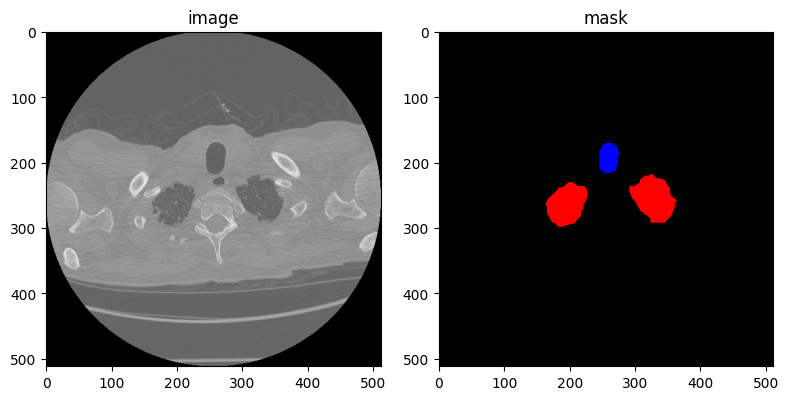

In [11]:
# segmentation 기법에서는 jpg 파일보다는 무손실 압축파일 방법인 png 혹은 array 형태로 저장하는게 좋음
sub_index = 2
img_name, mask_name = client_data.iloc[sub_index].values
img_path = os.path.join(data_dir, "images/images", img_name)
mask_path = os.path.join(data_dir, "masks/masks", mask_name)

image = cv2.imread(img_path)
mask = cv2.imread(mask_path)
thres = 240
mask[mask < thres] = 0
mask[mask >= thres] = 255

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.title("image")
plt.imshow(image)

plt.subplot(122)
plt.title("mask")
plt.imshow(mask)
plt.tight_layout()

In [12]:
np.unique(mask)

array([  0, 255], dtype=uint8)

Text(0.5, 1.0, 'trachea')

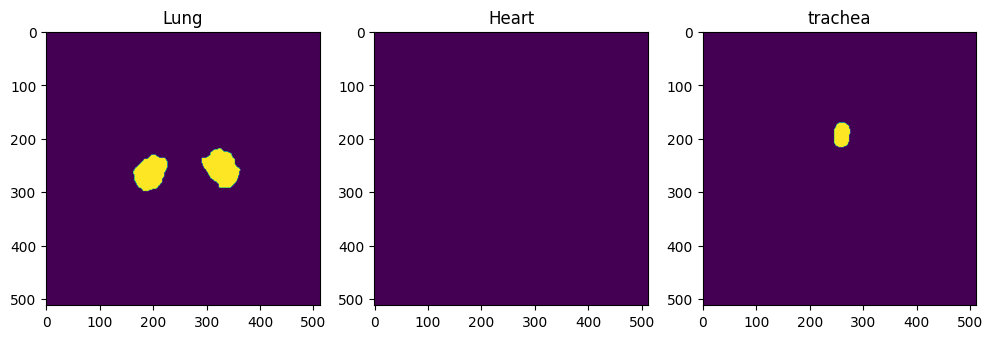

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(mask[..., 0])
plt.title("Lung")

plt.subplot(132)
plt.imshow(mask[..., 1])
plt.title("Heart")

plt.subplot(133)
plt.imshow(mask[..., 2])
plt.title("trachea")

In [14]:
def get_client_data(data_df, index):
    client_ids = np.unique(data_df.Id.values)
    client_id = client_ids[index]
    client_data = data_df[data_df.Id == client_id]
    image_files = list(client_data["ImageId"])
    mask_files = list(client_data["MaskId"])
    return client_id, image_files, mask_files

In [15]:
regions = ["background", "trachea", "heart", "lung"]
colors = ((0,0,0), (255,0,0), (0,255,0), (0,0,255)) # opencv는 BGR순으로 되어 있음

In [28]:
index = 0
client_id, image_files, mask_files = get_client_data(data_df, index)

canvas = np.zeros(shape=(512, 2*512+50, 3), dtype=np.uint8) # 기본적으로 영상을 출력할 때는 8비트로 진행

for i in range(len(image_files)):
    image = cv2.imread(os.path.join(data_dir, "images/images", image_files[i]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(os.path.join(data_dir, "masks/masks", mask_files[i]))
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    thres = 240
    mask[mask < thres] = 0
    mask[mask >= thres] = 255
    
    canvas[:, 0:512, :] = image
    canvas[:, 512+50:2*512+50, :] = mask
    
    text_buff = 410 
    for j in range(1, len(regions)): # 백그라운드 제외 기도,심장,폐로 삽입 putText
        # cv2.putText(이미지, 내용, 좌표, 폰트, 폰트 크기, 색깔, 두께)
        cv2.putText(canvas, f'{regions[j].upper()}', (900, text_buff), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[j], 2)
        text_buff += 40
        
    cv2.imshow("CT frames", canvas)
    key = cv2.waitKey(60)
    if key == 27:
        break

cv2.destroyAllWindows()

In [21]:
canvas.shape

(512, 1074, 3)

# 데이터셋 train, test로 나누기

train = [0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 13, 16, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 63, 64, 66, 67, 68, 70, 71, 72, 74, 75, 76, 77, 80, 81, 82, 83, 86, 87, 89, 90, 91, 93, 94, 96, 97, 99, 100, 101, 102, 104, 105, 106, 109, 110]


val = [ 62,  88,  84,  24,  12,  73,  18,   6,  65,  47,  26,  46, 103,
       107,  14,   4,  79,  35,  69,  61,  15,  78,  17,  40,  33, 108,
        95,  60,  48,  92,  85,  98, 111]

In [48]:
images_path = "./archive/images/images"
masks_path = "./archive/masks/masks"

In [45]:
print(len(os.listdir(image_dir)))
print(len(os.listdir(mask_dir)))

17011
16708


In [148]:
images_dir = os.listdir(images_path)
masks_dir = os.listdir(masks_path)

In [149]:
train_data = pd.read_csv("./archive/train.csv")
val_data = pd.read_csv("./archive/val.csv")

In [152]:
import shutil 

image_dir = "./archive/images/images/"
mask_dir = "./archive/masks/masks/"
des_image_dir = "./archive/train/images/"
des_mask_dir = "./archive/train/masks/"

for i in range(1, len(train_data)):
    image_start = image_dir + train_data.loc[i]["ImageId"]
    mask_start = mask_dir + train_data.loc[i]["MaskId"]
    image_des = des_image_dir + train_data.loc[i]["ImageId"]
    mask_des = des_mask_dir + train_data.loc[i]["MaskId"]
    
    shutil.move(image_start, image_des)
    shutil.move(mask_start, mask_des)

In [153]:
image_dir = "./archive/images/images/"
mask_dir = "./archive/masks/masks/"
des_image_dir = "./archive/val/images/"
des_mask_dir = "./archive/val/masks/"

for i in range(0, len(val_data)):
    image_start = image_dir + val_data.loc[i]["ImageId"]
    mask_start = mask_dir + val_data.loc[i]["MaskId"]
    image_des = des_image_dir + val_data.loc[i]["ImageId"]
    mask_des = des_mask_dir + val_data.loc[i]["MaskId"]
    
    shutil.move(image_start, image_des)
    shutil.move(mask_start, mask_des)

# 2. 데이터셋 구축과 연산을 위한 텐서변환 모듈 작성하기

In [159]:
import torch

In [160]:
data_dir = "./archive/"

In [161]:
IMAGE_SIZE = 224

In [185]:
class CT_dataset():
    def __init__(self, data_dir, phase, transformer=None):
        self.phase = phase
        self.images_dir = os.path.join(data_dir, phase, "images")
        self.masks_dir = os.path.join(data_dir, phase, "masks")
        self.image_files = [filename for filename in os.listdir(self.images_dir) if filename.endswith("jpg")]
        self.mask_files = [filename for filename in os.listdir(self.masks_dir) if filename.endswith("jpg")]
        assert len(self.image_files) == len(self.mask_files)
        
        self.transformer = transformer
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, index):
        image = cv2.imread(os.path.join(self.images_dir, self.image_files[index]))
        image = cv2.resize(image, dsize = (IMAGE_SIZE, IMAGE_SIZE), interpolation = cv2.INTER_LINEAR)
        mask = cv2.imread(os.path.join(self.masks_dir, self.mask_files[index]))
        mask = cv2.resize(mask, dsize = (IMAGE_SIZE, IMAGE_SIZE), interpolation = cv2.INTER_NEAREST) # 마스크에서는 비선형 보간법을 적용해야 함 -> 선형법으로 할 경우 segmentation 할 때 분류할 타겟값에 오류가 생김
        
        mask[mask < 240] = 0
        mask[mask >= 240] = 255
        mask = mask / 255. # mask normalize
        
        mask_H, mask_W, mask_C = mask.shape
        background = np.ones(shape=(mask_H, mask_W))
        background[mask[..., 0] != 0] = 0 # mask[..., 0] 
        background[mask[..., 1] != 0] = 0
        background[mask[..., 2] != 0] = 0
        mask = np.concatenate([np.expand_dims(background, axis=-1), mask], axis= -1)
        mask = np.argmax(mask, axis=-1, keepdims=False)
        
        if self.transformer:
            image = self.transformer(image)
        
        target = torch.from_numpy(mask).long()
        return image, target

In [190]:
from torchvision import transforms

def build_transformer():
    transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    return transformer

In [207]:
def collate_fn(batch):
    images = []
    targets = []
    for a, b in batch:
        images.append(a)
        targets.append(b)
    images = torch.stack(images, dim=0) # 배치차원 형태로 붙임
    targets = torch.stack(targets, dim=0)
    return images, targets

In [208]:
data_dir = "./archive"
transformer = build_transformer()
dset = CT_dataset(data_dir=data_dir, phase="train", transformer=transformer)

In [209]:
image, target = dset[0]
print(f"image shape: {image.shape}") # transformer 를 거쳐 torch 형태로 나옴
print(f"target shape: {target.shape}")

image shape: torch.Size([3, 224, 224])
target shape: torch.Size([224, 224])


In [210]:
from torch.utils.data import DataLoader

In [214]:
dloader = DataLoader(dset, batch_size=8, shuffle=True, collate_fn=collate_fn)

In [215]:
for index, batch in enumerate(dloader):
    images = batch[0]
    targets = batch[1]
    print(f"image shape: {images.shape}")
    print(f"target shape: {targets.shape}")
    
    if index == 0:
        break

image shape: torch.Size([8, 3, 224, 224])
target shape: torch.Size([8, 224, 224])


In [216]:
def build_dataloader(data_dir, batch_size=4):
    transformer = build_transformer()
    
    dataloaders = {}
    train_dataset = CT_dataset(data_dir=data_dir, phase="train", transformer=transformer)
    dataloaders["train"] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    
    val_dataset = CT_dataset(data_dir=data_dir, phase="val", transformer=transformer)
    dataloaders["val"] = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    return dataloaders

In [217]:
dataloaders = build_dataloader(data_dir=data_dir)

In [218]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1e338d12e60>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x1e338d12320>}

In [219]:
for phase in ["train", "val"]:
    for index, batch in enumerate(dataloaders[phase]):
        images = batch[0]
        targets = batch[1]
        print(f"images shape: {images.shape}")
        print(f"targets shape: {targets.shape}")
        
        if index == 0:
            break

images shape: torch.Size([4, 3, 224, 224])
targets shape: torch.Size([4, 224, 224])
images shape: torch.Size([4, 3, 224, 224])
targets shape: torch.Size([4, 224, 224])
